In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [33]:
working_directory = os.getcwd()
rawberrydf = pd.read_csv(working_directory + "/Masters_berry_spreadsheet.csv") 
coordinates = pd.read_csv(working_directory + "/SiteCoordinates.csv") 

In [6]:
rawberrydf.columns

Index(['Species', 'Site', 'Individual', 'nLeaves', 'SA (mm2)', 'Berry (g)',
       'Leaf (g)', 'Stem (g)', 'SLA', 'BMR', 'nFlwrs', 'nBerries', 'Fruit Set',
       'Base (mm)', 'TFR', 'pct.canopy', 'Age', 'PollenAv', 'Pollen1',
       'Pollen2', 'Pollen3', 'AvMoist', 'AvTemp', 'ALD', 'Elevation'],
      dtype='object')

In [41]:
rawberrydf['Fruit Set'] = rawberrydf['Fruit Set'].replace(['#VALUE!', '#DIV/0!'], 'NaN')
rawberrydf['Fruit Set'] = rawberrydf['Fruit Set'].astype(str).astype(float)
setdf = rawberrydf.groupby(['Site', 'Species', 'Elevation'], as_index=False)[['Fruit Set', 'nBerries']].mean()
setdf = pd.merge(setdf, coordinates, on='Site', how='inner')

In [42]:
setdf.head()

,Site,Species,Elevation,Fruit Set,nBerries,Lat,Long
0,BFY1,VACULI,497,0.344218,9.833333,65.119978,-147.429157
1,BFY1,VACVIT,497,0.386806,1.666667,65.119978,-147.429157
2,BFY10,VACULI,425,0.365914,3.916667,65.118668,-147.449410
3,BFY10,VACVIT,425,0.538889,1.750000,65.118668,-147.449410
4,BFY6,VACULI,210,0.009441,0.250000,65.118668,-147.477168


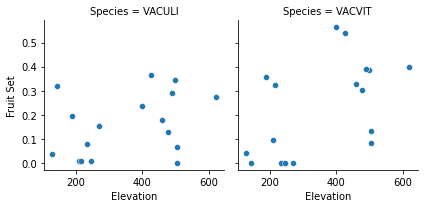

In [83]:
g=sns.FacetGrid(data=setdf, col='Species')
g.map(sns.scatterplot, "Elevation", "Fruit Set", sizes = 'nBerries',legend="full"
)


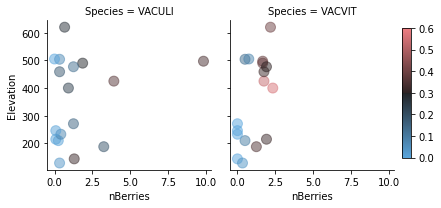

In [86]:
#https://stackoverflow.com/questions/44641669/scatterplot-with-point-colors-representing-a-continuous-variable-in-seaborn-face


g = sns.FacetGrid(setdf, col='Species', palette = 'seismic')

def facet_scatter(x, y, c, **kwargs):
    """Draw scatterplot with point colors from a faceted DataFrame columns."""
    kwargs.pop("color")
    plt.scatter(x, y, c=c, **kwargs)

vmin, vmax = 0, .6
cmap = sns.diverging_palette(240, 10, l=65, center="dark", as_cmap=True)

g = g.map(facet_scatter, 'nBerries','Elevation', "Fruit Set",
          s=100, alpha=0.5, vmin=vmin, vmax=vmax, cmap=cmap)

# Make space for the colorbar
g.fig.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = g.fig.add_axes([.94, .25, .02, .6])

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)

# Draw the colorbar
g.fig.colorbar(points, cax=cax)
